In [1]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('./Ch_1_Opencv_Intro/fig/my_brain.jpeg')
img_resize = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)

print(img.shape)
if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
cv2.imshow('image_RE', img_resize)

while True:
    key = cv2.waitKey()
    if key ==  27 or key == ord('q'):
        break
        
cv2.destroyAllWindows()

(630, 630, 3)


In [6]:
import glob

In [9]:
img_lists = glob.glob('./Ch_1_Opencv_Intro/fig/my_images/*.*')

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)
idx = 0
while True:
    img = cv2.imread(img_lists[idx])
    
    if img is None:
        print('image read failed')
        break
        
    cv2.imshow('scene', img)
    
    if cv2.waitKey(3000) == 27:
        break
        
    idx += 1
    if idx >=  len(img_lists):
        idx = 0
        
cv2.destroyAllWindows()
    

In [11]:
src = cv2.imread('./Ch_2_Opencv_basic/fig/airplane.bmp')
mask = cv2.imread('./Ch_2_Opencv_basic/fig/mask_plane.bmp', 0)
dst = cv2.imread('./Ch_2_Opencv_basic/fig/field.bmp')

if src is None or mask is None or dst is None:
    print('image read failed')
    sys.exit()

dst1 = cv2.copyTo(src, mask)

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst1', dst1)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
img = np.full((600, 1200, 3), (255, 255, 255), np.uint8)

cv2.line(img, (50, 50), (300, 50), (0, 0,  255), 4, cv2.LINE_8)
cv2.arrowedLine(img, (300, 50), (300, 200), (0, 0,  255), 4, cv2.LINE_8)
cv2.rectangle(img, (50, 400), (200, 500), (0, 0,  255), 4)
cv2.rectangle(img, (50, 400, 100, 100), (255, 0,  255), -1)
cv2.circle(img, (300, 300), 100, (255, 0, 0), 3, cv2.LINE_AA)
cv2.putText(img, 'OPencv', (300, 400), cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
           0.8, (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# import numpy as np
import cv2
import sys

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
# w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
# fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# out = cv2.VideoWriter('outout_blur.avi', fourcc, fps, (w, h))
cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)

while True:
        
        ret, frame = cap.read()
        cv2.imshow('img', frame)
        
        keycode = cv2.waitKey(30)
        
        if keycode ==  ord('i'):

            while True:
                ret, frame = cap.read()
                edge = cv2.Canny(frame, 50, 150)
                cv2.imshow('img', edge)
                key1 = cv2.waitKey(30)
                if key1 ==  27:
                    break
                       

        elif keycode == ord('f'):
            while True:
                ret, frame = cap.read()
                frame_inv = cv2.flip(frame, 1)
                cv2.imshow('img', frame_inv)
                if cv2.waitKey(30) ==  27:
                    break
        
        elif keycode ==  27:
            break

cap.release()
cv2.destroyAllWindows()

In [6]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down:', x, y)
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255),
                    4, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y
            

img =  np.ones((500, 700, 3), np.uint8)*255

cv2.namedWindow('image')

cv2.setMouseCallback('image', call_mouse, img)
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

left button down: 289 89


In [10]:
def call_tract(pos):
#     print(pos)
    img[:] = img1*(pos/255)
    
    cv2.imshow('image', img)
img = cv2.imread('./Ch_1_Opencv_Intro/fig/my_images/pexels-darwis-alwan-1808329.jpg', 
                cv2.IMREAD_REDUCED_GRAYSCALE_8)

img1 = img.copy()
cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0, 255, call_tract)

cv2.waitKey()
cv2.destroyAllWindows()

51
102
103
104
106
111
117
124
130
136
143
149
151
152
153
154
155
158
160
162
164
168
170
175
181
184
190
195
202
207
213
218
223
229
233
236
238
239
240
242
245
247
251
255
243
222
207
190
180
171
167
163
162
160
158
155
148
141
134
123
114
105
95
86
80
74
72
70
68
67
66
65
64
63
62
59
58
57
56
55
53
51
46
42
36
30
28
33
42
54
67
87
109
135
164
192
219
241
255


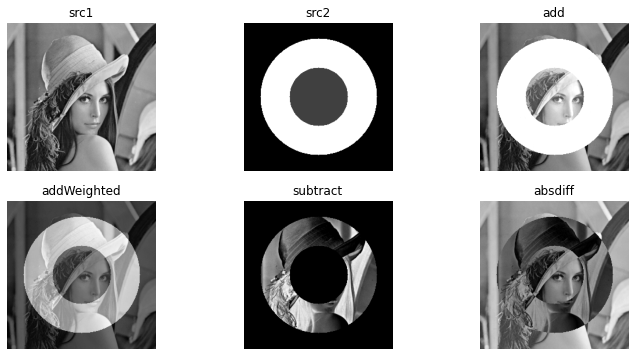

In [3]:
src1 = cv2.imread('./Ch_3_Basic_img_proc/fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.)
dst3 = cv2.subtract(src2, src1)
dst4 = cv2.absdiff(src1, src2)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
img = cv2.imread('./Ch_3_Basic_img_proc/fig/flowers.jpg', 1)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('img', img)

b, g, r = cv2.split(img)
h, s, v = cv2.split(img_hsv)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

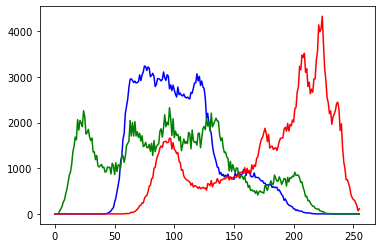

In [11]:
src = cv2.imread('./Ch_3_Basic_img_proc/fig/lenna.bmp', 1)
# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

cv2.imshow('src', src)

plt.plot(hist_b, c = 'b')
plt.plot(hist_g, c = 'g')
plt.plot(hist_r, c = 'r')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [46]:
##

src = cv2.imread('./Ch_4_Histogram_modi/fig/flowers.jpg', 0)

# smin, smax, _, _ = cv2.minMaxLoc(src)
# print(smin, smax)

# cv2.normalize(src, dst=None, alpha=None, beta=None, norm_type=None, dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: 정규화 최소값 (예, 0)
# beta: 정규화 최댓값 (예, 155)
# norm_type: cv2.NORM_MINMAX
# dtype =  -1, src와 같은 type

dst_norm_cv = cv2.normalize(src, None, 100, 155, cv2.NORM_MINMAX, -1)
dst_norm = np.clip(src*0.3 + 100., 0, 255).astype(np.uint8)
dst_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

# cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_cv', dst_norm_cv)
# cv2.imshow('dst_equal', dst_equal)


# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# src_b = cv2.calcHist([src], [0], None, [256], [0, 256])
# src_g = cv2.calcHist([src], [1], None, [256], [0, 256])
# src_r = cv2.calcHist([src], [2], None, [256], [0, 256])

# src_b = cv2.calcHist([dst_norm_cv], [0], None, [256], [0, 256])
# src_g = cv2.calcHist([dst_norm_cv], [1], None, [256], [0, 256])
# src_r = cv2.calcHist([dst_norm_cv], [2], None, [256], [0, 256])


# plt.plot(src_b, c = 'b')
# plt.plot(src_g, c = 'g')
# plt.plot(src_r, c = 'r')
# plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
src = cv2.imread('./Ch_4_Histogram_modi/fig/manjang.jpg', 
                 cv2.IMREAD_COLOR)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)
# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
equal = cv2.equalizeHist(v)
# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
src_Gaussian = cv2.GaussianBlur(equal, (0,0), 1)



src_norm = cv2.merge((h, s, norm))
src_equal = cv2.merge((h, s, equal))
src_Gaussian = cv2.merge((h, s, src_Gaussian))



src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)
src_Gaussian = cv2.cvtColor(src_Gaussian, cv2.COLOR_HSV2BGR)


cv2.imshow('img', src)
cv2.imshow('norm', src_norm)
cv2.imshow('equal', src_equal)
cv2.imshow('Gaussian', src_Gaussian)


cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    frame_flip = cv2.flip(frame, 1)
    cv2.imshow('image', frame)
    cv2.imshow('image_flip', frame_flip)
    
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [3]:
cap = cv2.VideoCapture(0)

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)


while True:
    
    ret, frame = cap.read()
    cv2.imshow('image', frame)
    
    keycode = cv2.waitKey(30)
    
    if keycode == ord('i'):
        while True:
            ret, frame = cap.read()
            edge = cv2.Canny(frame, 50, 150)
            cv2.imshow('image', edge)
            if cv2.waitKey(30) == 27:
                break
                
    elif keycode == ord('f'):
        while True:
            ret, frame = cap.read()
            frame = cv2.flip(frame)
            cv2.imshow('image', flip)
            if cv2.waitKey(30) == 27:
                break
    elif keycode == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'flip'
> Overload resolution failed:
>  - flip() missing required argument 'flipCode' (pos 2)
>  - flip() missing required argument 'flipCode' (pos 2)


In [16]:
# src = cv2.imread('./Ch_4_Histogram_modi/fig/palette.png')
src = cv2.imread('./Ch_4_Histogram_modi/fig/palette_dark.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
# inRange(src, lowerb, upperb[, dst]) -> dst
# src: 입력영상
# lowerb: 하한값 (0, 0, 0)
# upperb: 상한값 (255, 255, 255)

# dst_bgr = cv2.inRange(src, (0, 150, 0), (100, 255, 100))
# dst_bgr_dark = cv2.inRange(src_dark, (0, 150, 0), (50, 255, 50))
dst_hsv = cv2.inRange(src_hsv, (110, 150, 150), (130, 255, 255)) #h , s, v

cv2.imshow('src', src)
# cv2.imshow('src_dark', src_dark)
cv2.imshow('dst_hsv', dst_hsv)



cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'src')
    hmax = cv2.getTrackbarPos('H_max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 150), (hmax, 255, 255))
    cv2.imshow('src', dst)
    

src = cv2.imread('./Ch_4_Histogram_modi/fig/palette_dark.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.namedWindow('src')
cv2.createTrackbar('H_min', 'src', 50, 179, call_trackbar)
cv2.createTrackbar('H_max', 'src', 80, 179, call_trackbar)

cv2.imshow('src', src)
cv2.imshow('src1', src)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [4]:
src = cv2.imread('./Ch_4_Histogram_modi/fig/autumn.jpg')
dst = cv2.imread('./Ch_4_Histogram_modi/fig/chromakey.png')

h, w = dst.shape[:2]
src = cv2.resize(src, (w, h), cv2.INTER_AREA)

dst_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(dst_hsv, (50, 50, 0), (80, 255, 255))
# print(src.shape)
# print(dst.shape)
cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)


cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

def call_trackbar(pos):
    hmin = cv2.getTrackbarPos('hmin', 'mask')
    hmax = cv2.getTrackbarPos('hmax', 'mask')
    smin = cv2.getTrackbarPos('smin', 'mask')
    
    dst_mask = cv2.inRange(dst_hsv, (hmin, smin, 0), (hmax, 255, 255))
    
    dst1 = dst.copy()
    
    cv2.copyTo(src, dst_mask, dst1)
    cv2.imshow('mask', dst_mask)
    cv2.imshow('dst', dst1)   
    


src = cv2.imread('./fig/autumn.jpg')
dst = cv2.imread('./fig/chromakey.png')

h, w = dst.shape[:2]
src = cv2.resize(src, (w, h), cv2.INTER_AREA)

dst_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

cv2.namedWindow('mask')
cv2.createTrackbar('hmin', 'mask', 50, 179, call_trackbar)
cv2.createTrackbar('hmax', 'mask', 90, 179, call_trackbar)
cv2.createTrackbar('smin', 'mask', 10, 255, call_trackbar)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
